In [3]:
import MDAnalysis
from MDAnalysis import Universe
u = Universe('INT1ALL.pdb','INT1ALL.xtc')

In [4]:
print (u.atoms)
import MDAnalysis.analysis.pca as pca
pc= pca.PCA(u, select='backbone',n_components=10)
pc.run()

<AtomGroup [<Atom 1: CA of type C of resname LEU, resid 1 and segid A and altLoc >, <Atom 2: CA of type C of resname ASN, resid 2 and segid A and altLoc >, <Atom 3: CA of type C of resname LEU, resid 3 and segid A and altLoc >, ..., <Atom 1768: CA of type C of resname ARG, resid 1768 and segid B and altLoc >, <Atom 1769: CA of type C of resname GLY, resid 1769 and segid B and altLoc >, <Atom 1770: CA of type C of resname THR, resid 1770 and segid B and altLoc >]>


In [5]:
print(pc.p_components.shape) 

(5310, 10)


In [6]:
import numpy as np
n_pcs = np.where(pc.cumulated_variance > 0.95)[0][0]
atomgroup = u.select_atoms('backbone')
pca_space = pc.transform(atomgroup, n_components=n_pcs)

In [7]:
print(pca_space.shape)

(5893, 2)


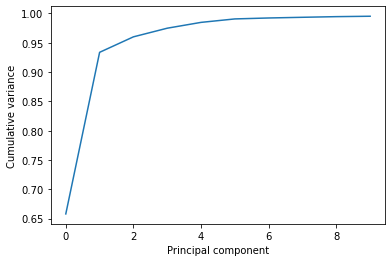

In [8]:
import matplotlib.pyplot as plt
plt.plot(pc.cumulated_variance[:10])
plt.xlabel('Principal component')
plt.ylabel('Cumulative variance');

In [9]:
print(pc.cumulated_variance)


[0.65807237 0.93367664 0.96008457 0.97481478 0.98474971 0.99063557
 0.9922479  0.99341175 0.9945172  0.99520253]


In [10]:
transformed = pc.transform(atomgroup, n_components=2)
PC1=transformed[:,0]
PC2=transformed[:,1]
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

print(PC2)

[-2.11747456e+03 -2.11696617e+03 -2.13715585e+03 -2.20505765e+03
 -2.14649644e+03 -2.15990034e+03  5.40388330e+02  6.23343186e+02
  6.76278835e+02  6.61574000e+02  7.38366471e+02  7.24984774e+02
  6.63839689e+02 -2.05796515e+03 -2.05853664e+03 -2.04041822e+03
 -2.08374330e+03 -2.05826418e+03  6.06181536e+02 -2.11111658e+03
  8.53322922e+02  8.26960623e+02  6.78025403e+02  7.54248231e+02
  7.01364035e+02 -2.14991463e+03 -2.11443238e+03  8.94822170e+02
 -2.10881711e+03  9.19872339e+02  8.70592265e+02  8.22486430e+02
  8.47633901e+02  9.00164795e+02  8.48862371e+02  8.04591220e+02
  1.35258784e+03  1.25186053e+03 -2.13147884e+03  6.87076640e+02
  6.75385734e+02 -2.06768863e+03  6.02378591e+02  6.18607187e+02
  5.74354455e+02  5.70714487e+02  5.46550605e+02  5.10838484e+02
  5.41875200e+02  5.30978480e+02  7.91890972e+02  8.86452884e+02
  8.76137639e+02  8.04428742e+02  7.08299910e+02  6.86578891e+02
  6.48868675e+02  7.20783608e+02  6.35801727e+02  6.24830495e+02
  6.09815837e+02  6.58198

In [12]:
import pandas as pd
df = pd.DataFrame(transformed,
columns=['PC{}'.format(i+1) for i in range(2)])
df['Time (ns)'] = df.index * u.trajectory.dt *0.001  #dt is in ps its value is 100ps we convert it to ns using 0.001 then dt becomes 0.1 ns so to get 100 ns we multiply 1000
print(u.trajectory.dt*0.001)
data=np.column_stack([PC1, PC2,df['Time (ns)']])
datafile_path = "/Users/nidhisoley/Desktop/RA-SCI/int1/dataint1.txt"
np.savetxt(datafile_path , data, fmt=['%0.4f','%0.4f','%0.4f'])
#print(df['Time (ns)'])
#df.head()

0.1


/Users/nidhisoley/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


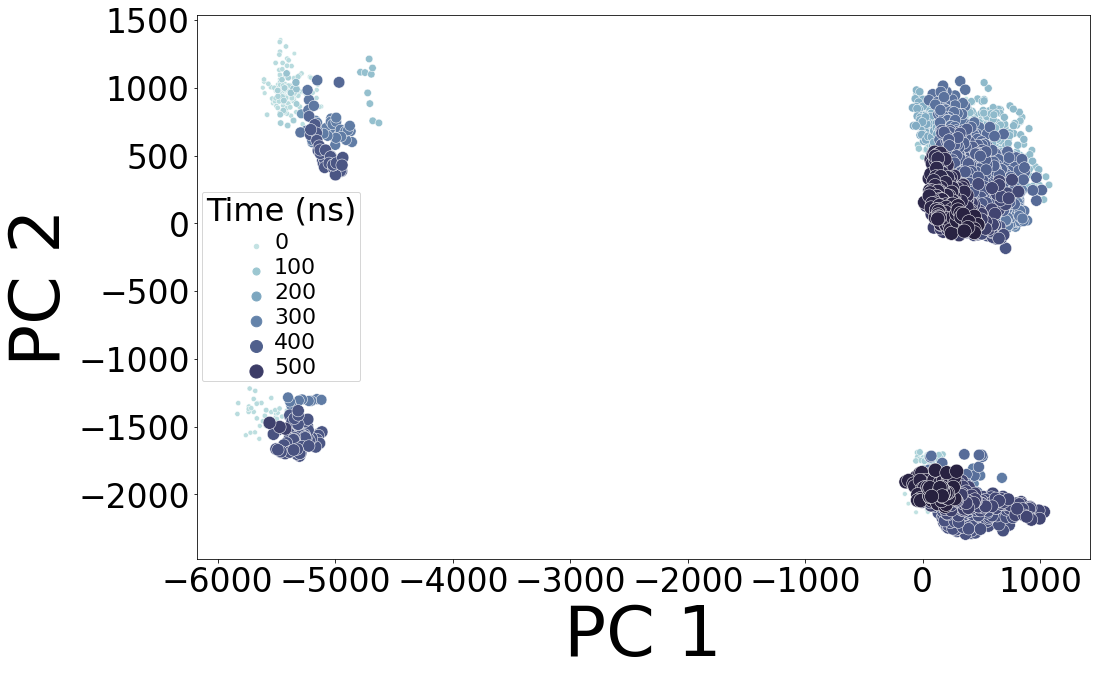

In [11]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 70)
ax.set_ylabel('PC 2', fontsize = 70)
#ax.set_title('Plot of 1st Two Principal Components', fontsize = 30)
# Create as many colors as there are unique midwest['category']
import seaborn as sns
g =sns.scatterplot(PC1, PC2,
              hue='Time (ns)',
              data=df,size="Time (ns)",sizes=(20, 200),palette="ch:start=.2,rot=-.3");
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

# ax.scatter(PC1, PC2, s = 50,c='Time (s)')
plt.xticks(fontsize=33)
plt.yticks(fontsize=33)
#ax.grid()
plt.savefig('/Users/nidhisoley/Desktop/RA-SCI/int1/int1pca.png',bbox_inches="tight")

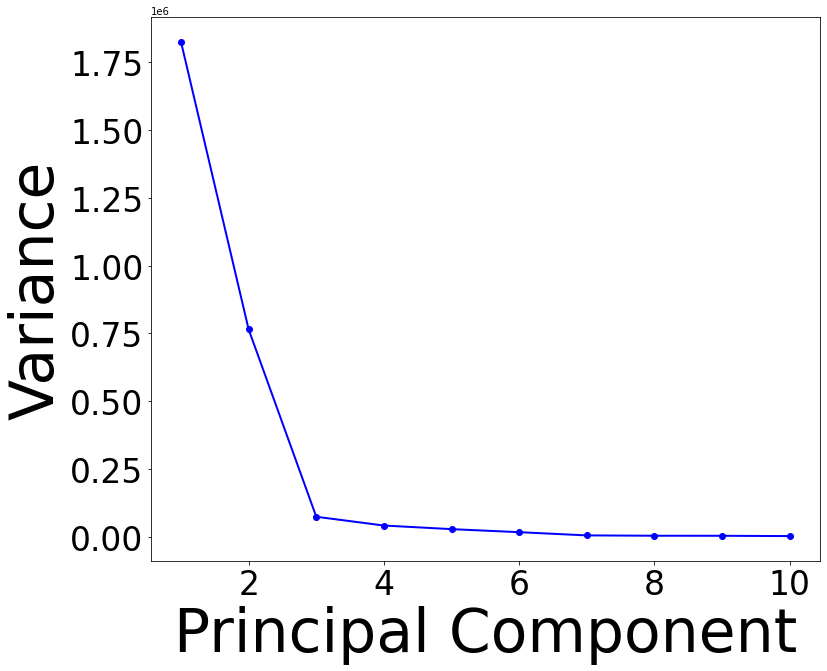

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,10))
PC_values = np.arange(pc.n_components) + 1
ax=plt.plot(PC_values, pc.variance, 'ro-', linewidth=2,color="blue")
plt.xlabel('Principal Component', fontsize = 60)
plt.ylabel('Variance', fontsize = 60)
#plt.title('Scree Plot', fontsize = 40)
plt.xticks(fontsize=33)
plt.yticks(fontsize=33)
plt.savefig('/Users/nidhisoley/Desktop/RA-SCI/int1/int1scree.png',bbox_inches="tight")
plt.show()


In [13]:
pc.variance

array([1085462.56302558,  760968.7782987 ,   47882.37572335,
         29241.80487156,    5120.77291959,    3830.91293447,
          3254.54454225,    1878.81261703,    1555.00965831,
          1287.02461373])